In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("ETH-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797
1918,2024-05-31,3746.861572,3843.857666,3723.835205,3760.026611,3760.026611,15290700646


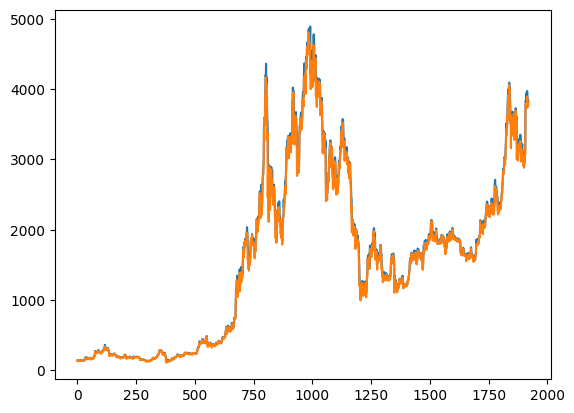

In [58]:
y = df[["Close"]]
X= df[["High"]]
plt.plot(X)
plt.plot(y)
plt.show()

<h1>Tỉ lệ Train Test 7:3

In [59]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 1.9803727540745535
MSE:  2391.2266121937296
RMSE: 48.90016985853658
R_Square:  0.9950523989166258


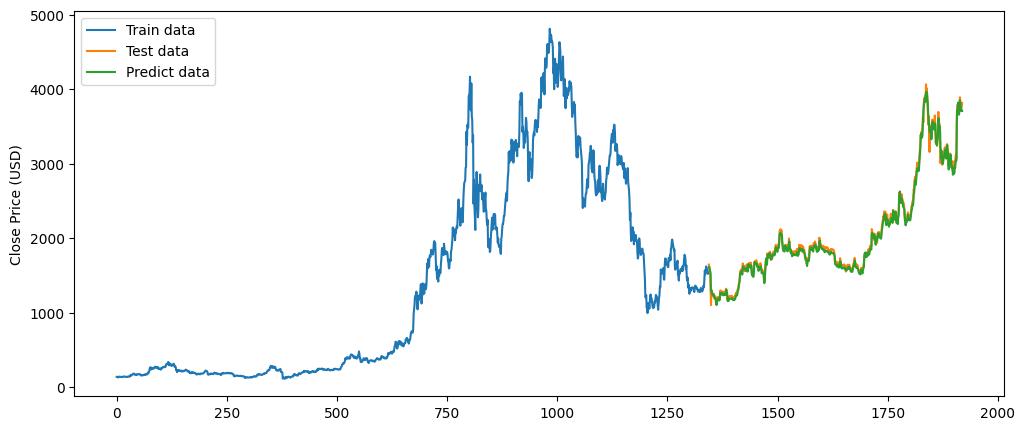

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [64]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [65]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

x_next_30_day

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

[array([[3710.31434992]]),
 array([[3595.07355493]]),
 array([[3483.45476008]]),
 array([[3375.34412647]]),
 array([[3270.63139315]]),
 array([[3169.20976465]]),
 array([[3070.97580205]]),
 array([[2975.82931752]]),
 array([[2883.67327209]]),
 array([[2794.41367675]]),
 array([[2707.95949651]]),
 array([[2624.22255762]]),
 array([[2543.11745762]]),
 array([[2464.5614782]]),
 array([[2388.47450092]]),
 array([[2314.77892542]]),
 array([[2243.39959033]]),
 array([[2174.26369655]]),
 array([[2107.3007331]]),
 array([[2042.4424051]]),
 array([[1979.6225642]]),
 array([[1918.77714106]]),
 array([[1859.84408005]]),
 array([[1802.76327591]]),
 array([[1747.47651251]]),
 array([[1693.92740343]]),
 array([[1642.06133447]]),
 array([[1591.82540793]]),
 array([[1543.16838869]]),
 array([[1496.04065196]])]

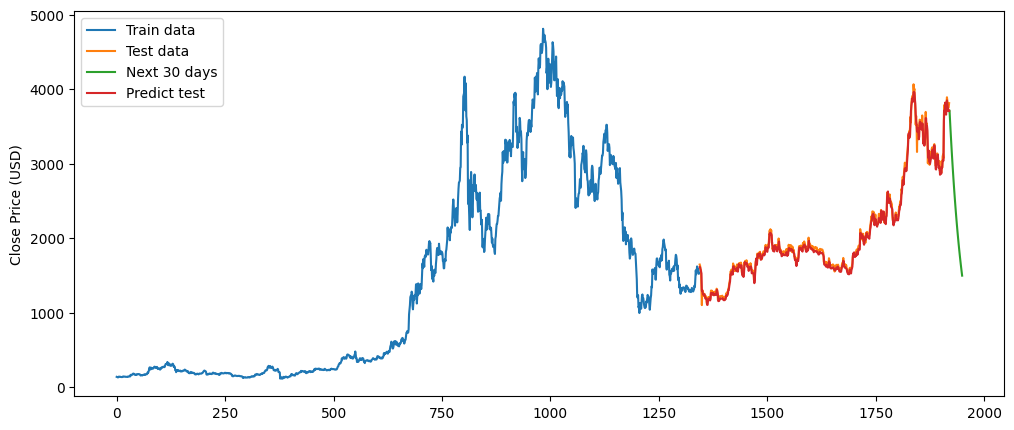

In [66]:
x_next_30_day = np.array(x_next_30_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict test')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

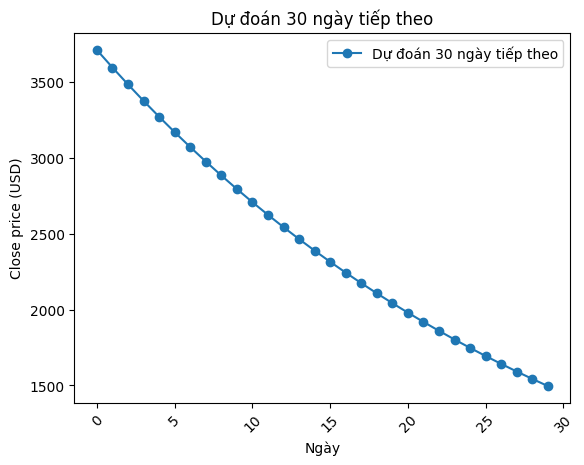

In [67]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [68]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [69]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

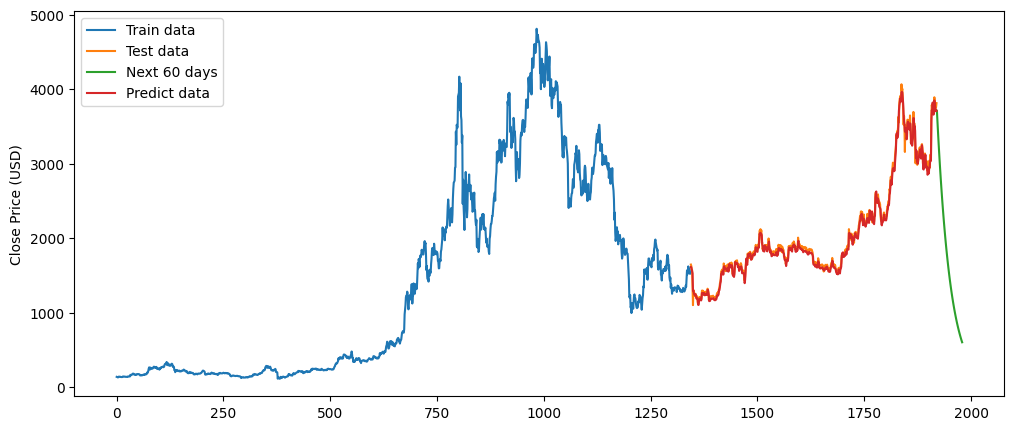

In [70]:
x_next_60_day = np.array(x_next_60_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

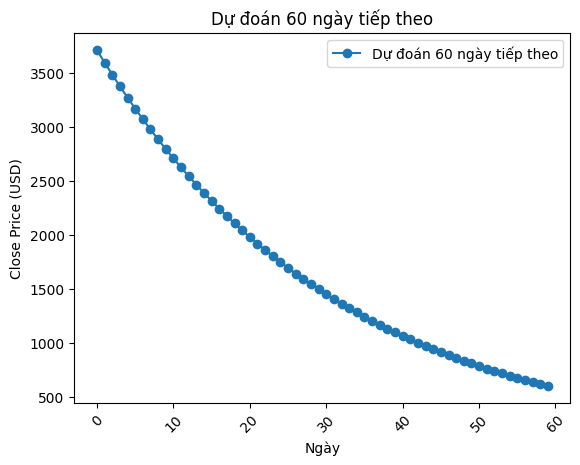

In [71]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [72]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [73]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

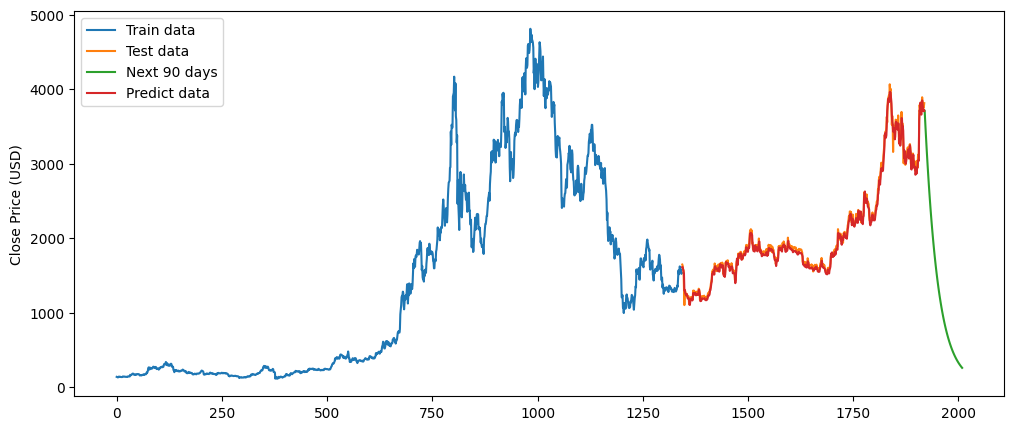

In [74]:
x_next_90_day = np.array(x_next_90_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

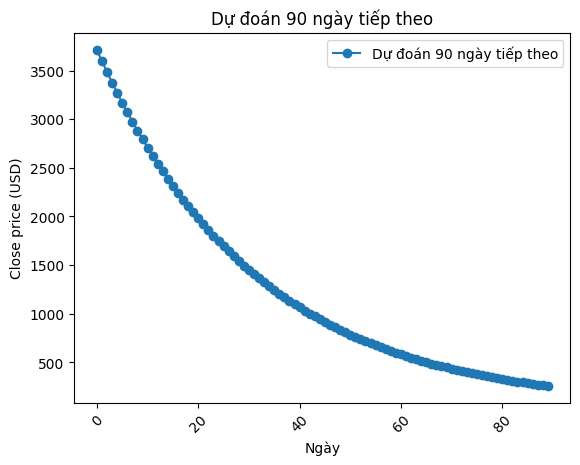

In [75]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

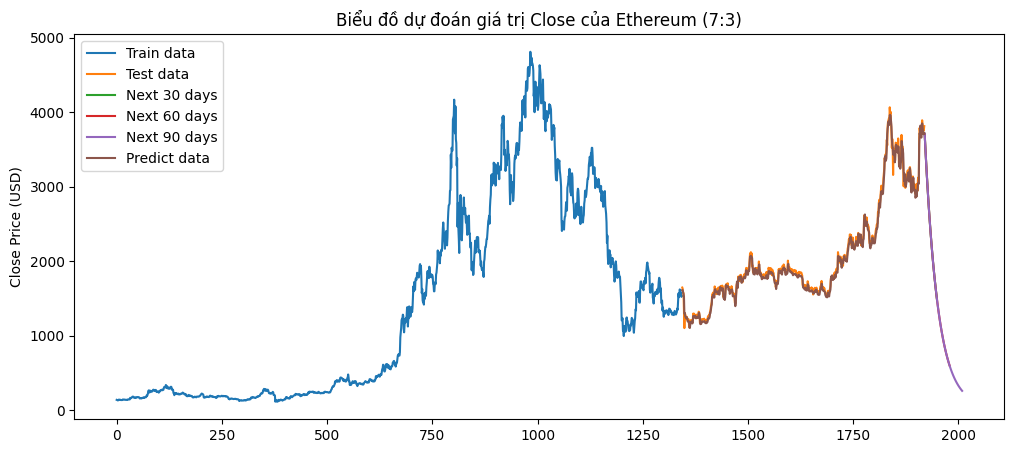

In [76]:
# bảng dự đoán chung

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.title('Biểu đồ dự đoán giá trị Close của Ethereum (7:3)')
plt.legend()
plt.show()

<h1>Tỉ lệ train test 8:2

In [77]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [79]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 1.8648639882129443
MSE:  2707.694125727564
RMSE: 52.035508316221566
R_Square:  0.9944293595758333


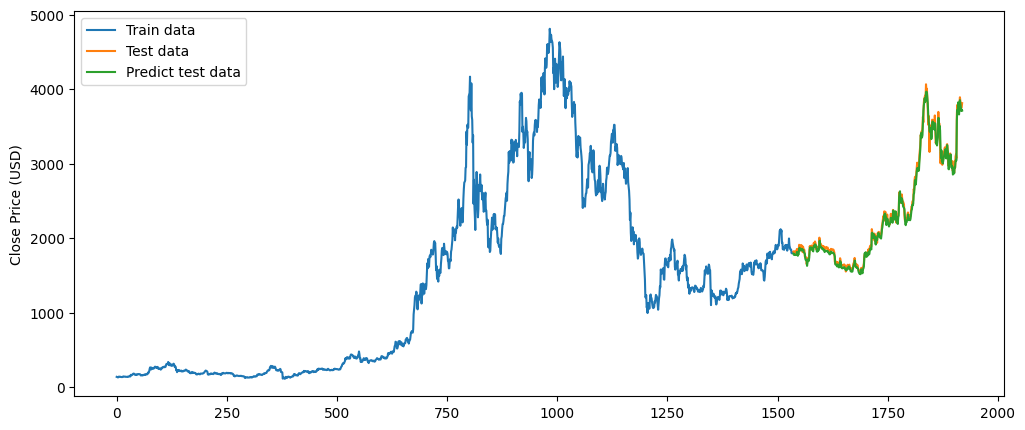

In [80]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [81]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [82]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

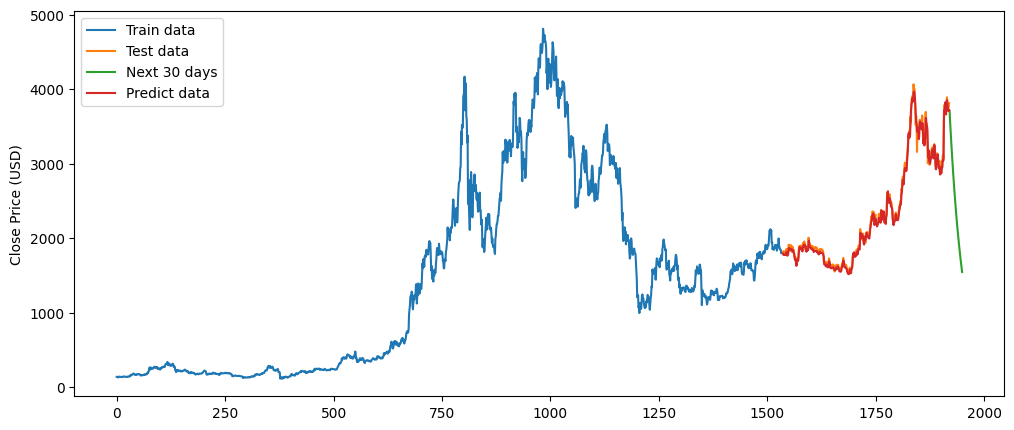

In [83]:
x_next_30_day = np.array(x_next_30_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

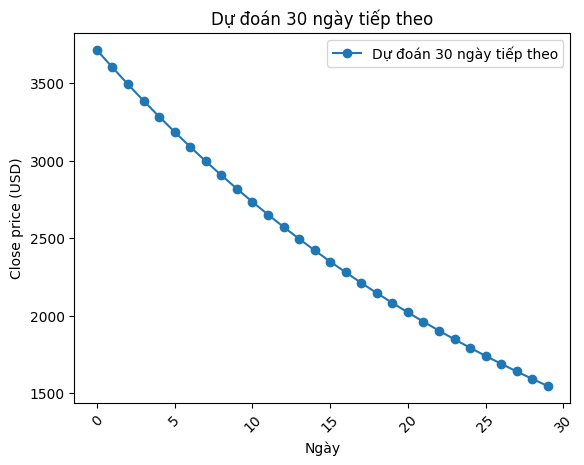

In [84]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [85]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [86]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

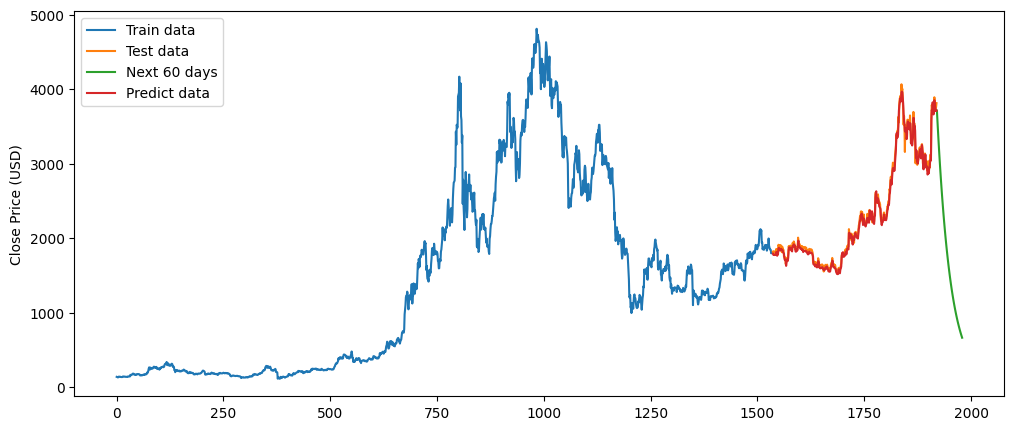

In [87]:
x_next_60_day = np.array(x_next_60_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

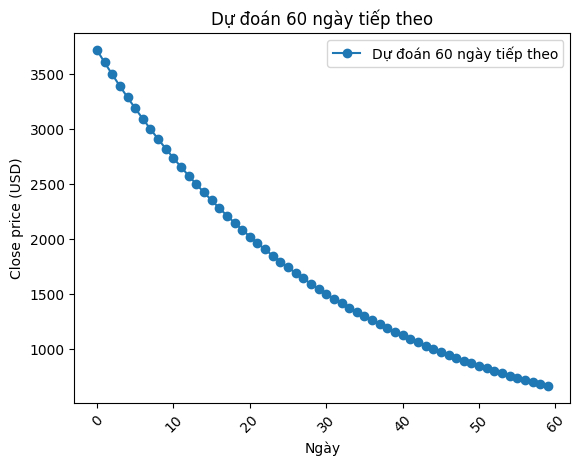

In [88]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [89]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [90]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

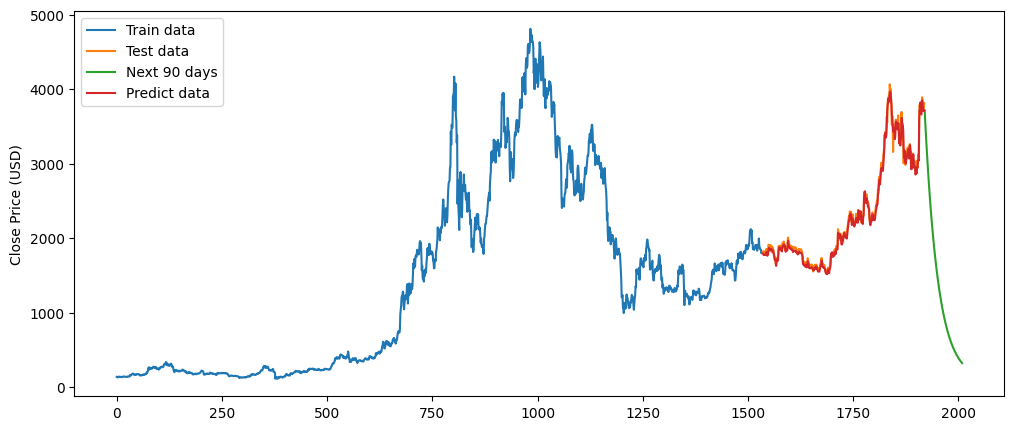

In [91]:
x_next_90_day = np.array(x_next_90_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

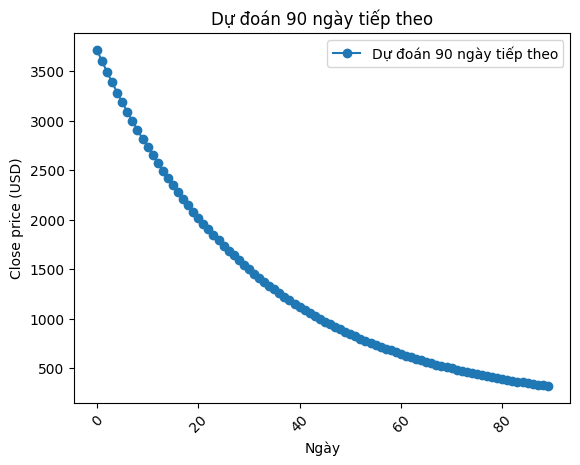

In [92]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

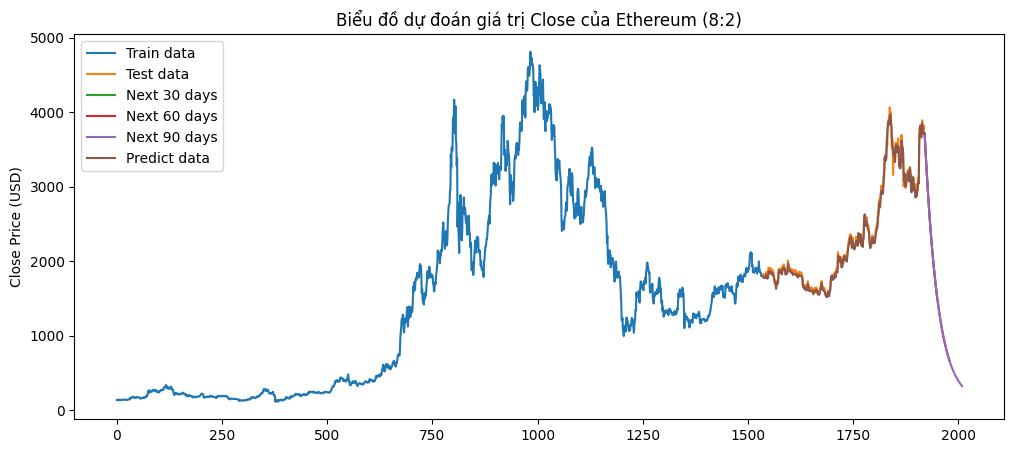

In [93]:
# biểu đồ dự đoán chung cho 30 60 90 ngày
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.title('Biểu đồ dự đoán giá trị Close của Ethereum (8:2)')
plt.legend()
plt.show()

<h1>Tỉ lệ 9:1

In [94]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [96]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 1.7447331357764047
MSE:  3916.6575496838173
RMSE: 62.583205012877194
R_Square:  0.988291657005807


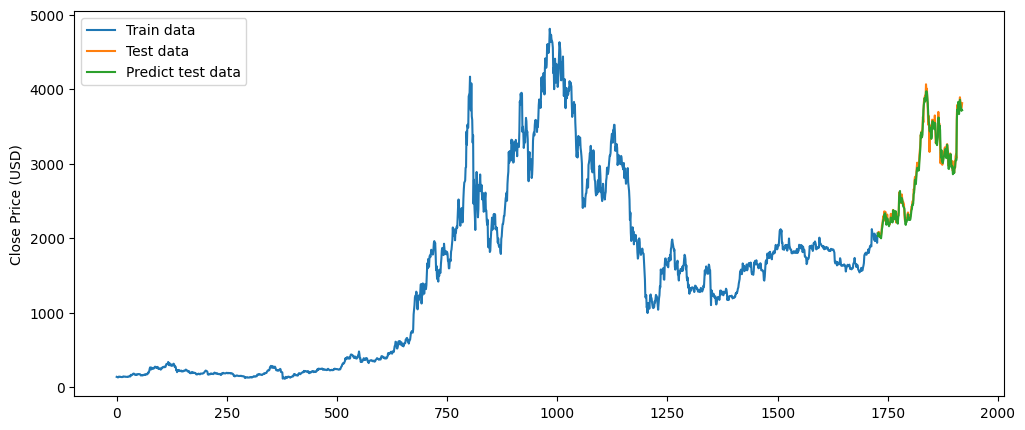

In [97]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [98]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [99]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

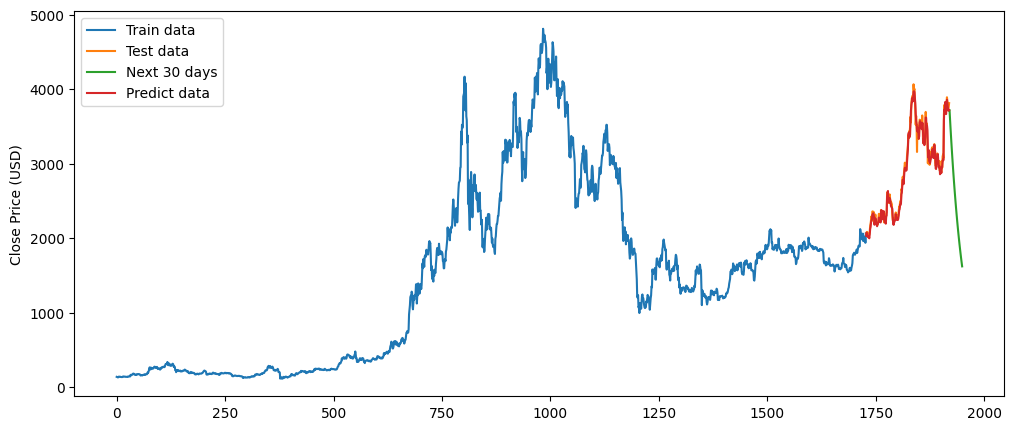

In [100]:
x_next_30_day = np.array(x_next_30_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30), x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

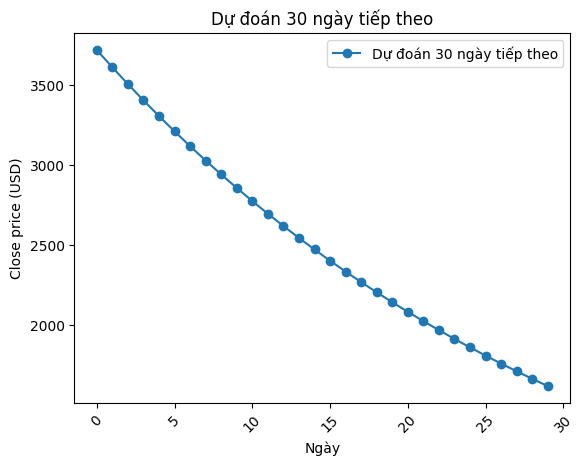

In [101]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [102]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [103]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

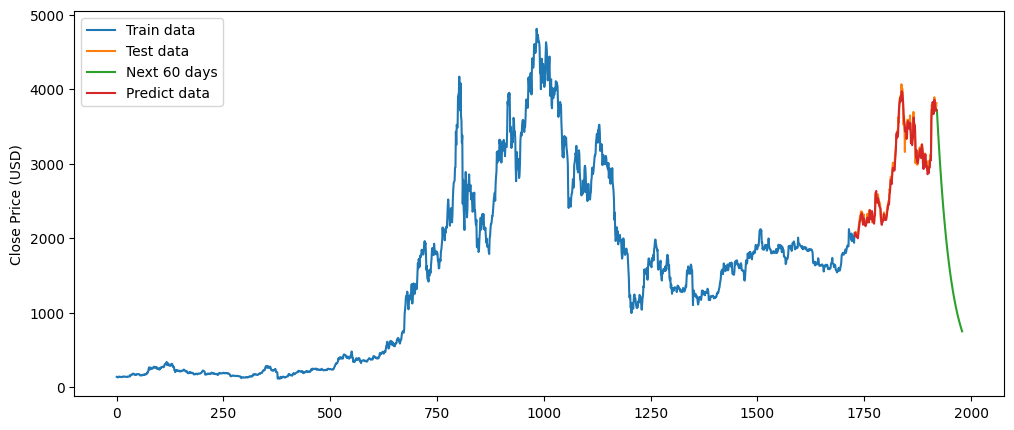

In [104]:
x_next_60_day = np.array(x_next_60_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

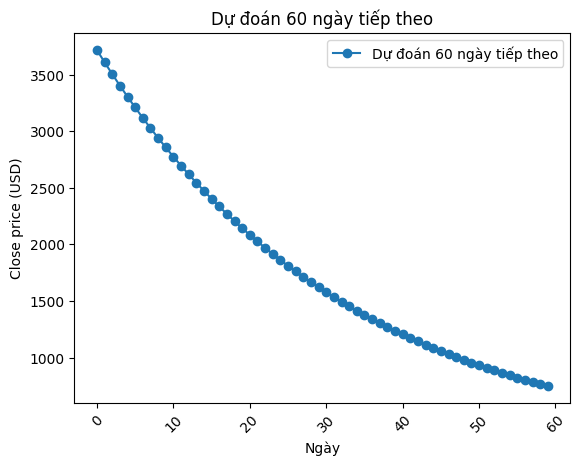

In [105]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [106]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3829.294678]])

In [107]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

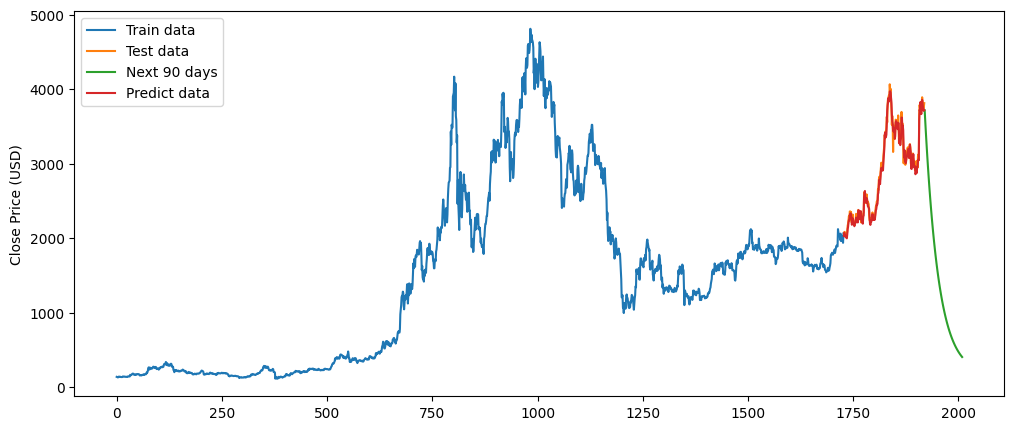

In [108]:
x_next_90_day = np.array(x_next_90_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

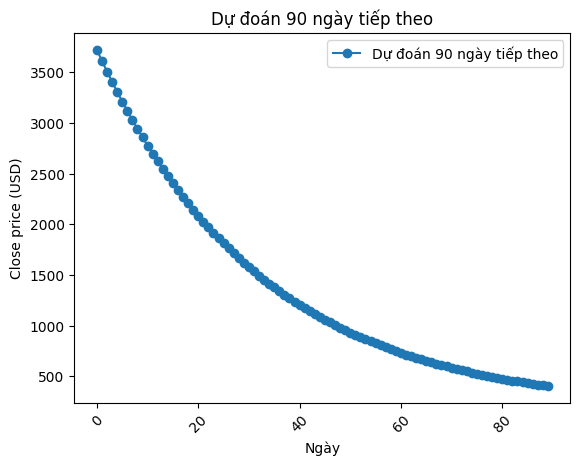

In [109]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

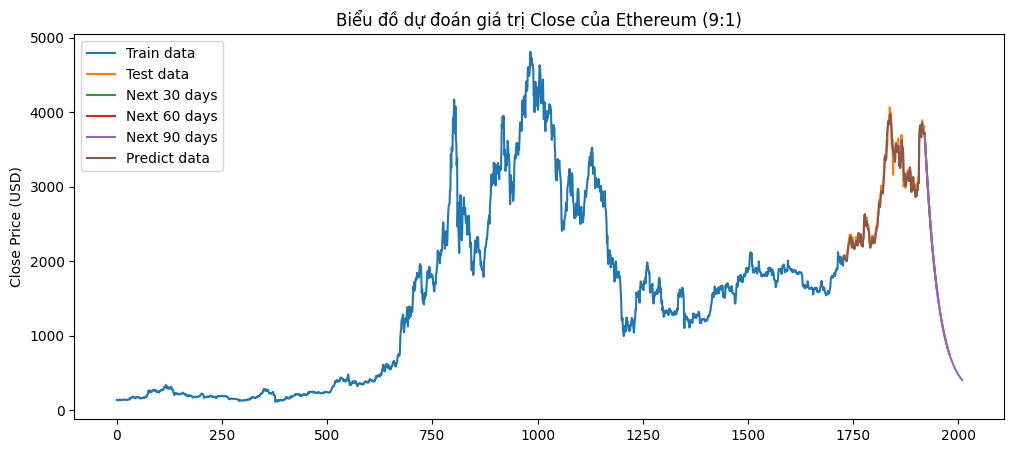

In [110]:
# Biểu đồ tổng thể dự đoán 30 60 90 ngày theo tỉ lệ 9:1

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.title('Biểu đồ dự đoán giá trị Close của Ethereum (9:1)')
plt.legend()
plt.show()